Purpose: To generate a figure summarizing characteristics of the BioProjects selected for the study.<br>
Author: Anna Pardo<br>
Date initiated: July 24, 2023 

In [1]:
# import modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Things I want to show with this figure:
1. How many BioProjects there are for each stressor
2. How many samples are present in each BioProject (distribution? break down by control vs. stressed?)
3. Number of samples per stressor (break down by control vs. stressed?)

In [2]:
# load the metadata sheet
md = pd.read_csv("../data/srr_numbers_with_metadata_12-May-2023.csv",sep=",",header="infer")
md.head()

,BioProject,Sample,sample_name,Replicate_num,Genotype,Technology,Library_layout,Treatment,Duration_hours,Time_after_treatment,...,Developmental_stage,Tissue,Day_length_hours,Day_temp_C,Night_temp_C,Relative humidity (%),Light (umol/m2/s),Growth Env.,Media,Notes
0,PRJNA637522,SRR11933261,238_WS2,NaN,238,Illumina HiSeq 2500,PAIRED,Drought,312.0,13 days,...,V3,Leaf,16.0,25.0,NaN,NaN,NaN,Greenhouse,NaN,NaN
1,PRJNA637522,SRR11933272,238_WS1,NaN,238,Illumina HiSeq 2500,PAIRED,Drought,216.0,9 days,...,V3,Leaf,16.0,25.0,NaN,NaN,NaN,Greenhouse,NaN,NaN
2,PRJNA637522,SRR11933250,268_WS1,NaN,268,Illumina HiSeq 2500,PAIRED,Drought,216.0,9 days,...,V3,Leaf,16.0,25.0,NaN,NaN,NaN,Greenhouse,NaN,NaN
3,PRJNA637522,SRR11933029,268_WW,NaN,268,Illumina HiSeq 2500,PAIRED,Control,216.0,9 days,...,V3,Leaf,16.0,25.0,NaN,NaN,NaN,Greenhouse,NaN,NaN
4,PRJNA637522,SRR11933040,268_WS2,NaN,268,Illumina HiSeq 2500,PAIRED,Drought,312.0,13 days,...,V3,Leaf,16.0,25.0,NaN,NaN,NaN,Greenhouse,NaN,NaN


In [3]:
# load TPM dataframe
tpm = pd.read_csv("../data/rawtpm_bptreat_noPEG.tsv",sep="\t",header="infer")
tpm.head()

,Sample,BioProject,Treatment,Zm00001eb000010,Zm00001eb000020,Zm00001eb000050,Zm00001eb000060,Zm00001eb000070,Zm00001eb000080,Zm00001eb000100,...,Zm00001eb442810,Zm00001eb442820,Zm00001eb442840,Zm00001eb442850,Zm00001eb442870,Zm00001eb442890,Zm00001eb442910,Zm00001eb442960,Zm00001eb442980,Zm00001eb443030
0,SRR11933261,PRJNA637522,Drought,12.553818,2.321077,0.042520,12.932676,5.253755,11.105837,0.409268,...,0.171184,0.000000,0.0,0.0,0.0,0.309501,0.0,0.000000,0.0,0.000000
1,SRR11933272,PRJNA637522,Drought,16.255838,3.110372,0.405226,7.214039,1.902461,2.346186,0.170305,...,0.108052,0.127878,0.0,0.0,0.0,6.703281,0.0,0.000000,0.0,0.000000
2,SRR11933250,PRJNA637522,Drought,9.028815,2.984479,0.000000,3.092442,2.586555,16.186141,0.000000,...,0.000000,0.000000,0.0,0.0,0.0,0.417565,0.0,0.254123,0.0,1.213349
3,SRR11933029,PRJNA637522,Control,8.201340,2.385748,0.000000,1.726808,1.926412,19.600487,0.000000,...,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,1.370075
4,SRR11933040,PRJNA637522,Drought,10.371251,2.799099,0.000000,1.280629,3.771234,19.717683,0.143764,...,0.178304,0.012158,0.0,0.0,0.0,9.625225,0.0,0.000000,0.0,2.352959


In [4]:
# subset metadata to only that found in TPM dataframe
mdsub = md.merge(tpm[["Sample","BioProject","Treatment"]])

In [5]:
# rename DroughtRepeat to Drought
mdsub["Treatment"].mask(mdsub["Treatment"]=="DroughtRepeat","Drought",inplace=True)

In [6]:
# first figure: basic bar plot of number of BioProjects per stressor
## generate the plotting dataframe
treat = []
bpcount = []
stresscount = []
for t in ["Drought","Salt","Cold","Heat","Low_Nitrogen","Flooding"]:
    treat.append(t)
    df = mdsub[mdsub["Treatment"]==t]
    bpcount.append(len(df["BioProject"].unique()))
    stresscount.append(len(df["Sample"].unique()))
counts = pd.DataFrame(list(zip(treat,bpcount,stresscount)),columns=["Treatment","Number of BioProjects","Number of Stressed Samples"])

In [13]:
counts

,Treatment,Number of BioProjects,Number of Stressed Samples
0,Drought,15,608
1,Salt,5,29
2,Cold,8,225
3,Heat,8,187
4,Low_Nitrogen,5,76
5,Flooding,3,48


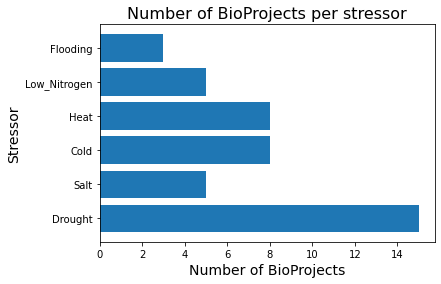

In [13]:
# plot the number of BioProjects
plt.barh(counts["Treatment"],counts["Number of BioProjects"])
plt.title("Number of BioProjects per stressor",fontsize=16)
plt.xlabel("Number of BioProjects",fontsize=14)
plt.ylabel("Stressor",fontsize=14)
plt.savefig("../figures/bioprojects_per_stressor_barplot.svg",bbox_inches="tight")

In [9]:
# find the number of associated control samples per stressor
ctrlcounts = []
for i in list(counts["Treatment"]):
    df = mdsub[mdsub["Treatment"]==i]
    bps = df["BioProject"].unique()
    df2 = mdsub[mdsub["BioProject"].isin(bps)]
    df3 = df2[df2["Treatment"]=="Control"]
    ctrlcounts.append(len(df3["Sample"].unique()))

In [10]:
# add to the counts dataframe
counts["Number of Control Samples"] = ctrlcounts
counts

,Treatment,Number of BioProjects,Number of Stressed Samples,Number of Control Samples
0,Drought,15,608,377
1,Salt,5,29,27
2,Cold,8,225,249
3,Heat,8,187,210
4,Low_Nitrogen,5,76,73
5,Flooding,3,48,21


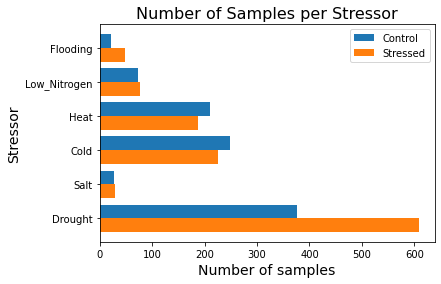

In [12]:
X_axis = np.arange(len(counts["Treatment"]))

plt.barh(X_axis+0.2,counts["Number of Control Samples"],0.4,label="Control")
plt.barh(X_axis-0.2,counts["Number of Stressed Samples"],0.4,label="Stressed")

plt.yticks(X_axis,counts["Treatment"])
plt.title("Number of Samples per Stressor",fontsize=16)
plt.ylabel("Stressor",fontsize=14)
plt.xlabel("Number of samples",fontsize=14)
plt.legend()
plt.savefig("../figures/samples_per_stressor_barplot.svg",bbox_inches="tight")